In [5]:
import numpy as np
arr = np.array([1,2,5,5,5,5,5,5,7,5,20,5,9,5,8,9])
np.percentile(arr, [25, 50,75])


array([5.  , 5.  , 7.25])

# Statistics and Hypothesis Testing

### Decision Making Using P and Critical Value for Hypothesis Testing

1. Define the statement of the hypothesis (clearly showing dependent and independent variables)
2. Establish the Null and Alternative Hypothesis ($H_0$ vs $H_a$)
3. Choose the appropriate type of tests based on the sample size, count(how many samples), data type, and objective 
    - t-test
    - z-test
    - chi-square test
    - ANOVA
4. If not mentioned, define the level of significance (critical value or **alpha**) (most of the time it is 1% or 5%)
5. Obtain the p value
6. Run the evaluation based on p-value and alpha
    - If the p-value is **greater** than alpha, we **do NOT reject the null hypothesis** ( there's no change)
    - If the p-value is **less** than alpha, we **do reject the null hypothesis**

## p- value vs alpha

![pv](https://www.automacaodedados.com.br/en/stories/estatistica-em-testes-para-nao-matematicos-parte-5/images/figure3-p-value-greater-than-alpha-en.webp)

## t-test
### When to use t-test?
- When the sample size is very small (<=30)
- when the data is close to a normal distribution
- When you're comparing the means of 2 groups to evaluate if they differ ot not (different samples)
- When you're comparing the effect of a variable in before or after situation (same sample)

### Types of t-tests
- **Independent sample t-test** check the average of 2 independent, unrelated groups. e.g. people that eat bananas have a stomach ache vs different people who do not eat bananas
    - $H_0$: $\mu_a$ = $\mu_b$ there's no difference between the groups
    - $H_a$: $\mu_a$ $\neq$ $\mu_b$ there's a difference between the groups

- **Paird-sample t-test** checks if the average of 2 samples taken from the same population. Mainly used for before vs after analysis. Here we have the difference between before and after $\mu_d$. Example assessing the impact of medication on the same group of people (before medication vs after medication)
    - $H_0$: $\mu_d$ = 0 there's no difference between the before and after
    - $H_a$: $\mu_d$ $\neq$ 0 there's a difference between before and after

- **One-sample t-test:** The average of a single group is difference than the known average (population [mean is X]). Average adult in the US has IQ of 999. We evaluate the sample against the known average.
    - $H_0$: $\mu_a$ = X there's no difference between the sample and population
    - $H_a$: $\mu_d$ $\neq$ X there's a difference between sample and population

### Independent t-test

**Scenario: A/B Testing for Website Conversion Rates**

Imagine you work for an e-commerce company, and your team is responsible for optimizing the company's website to increase user engagement and, ultimately, sales. The current design of the "Buy Now" button on the website is being tested against a new design to see if it leads to a higher conversion rate.

 
Methodology:
- randomly selected website users broken into 2 independent groups (groups A and B)
- give group A the old website (old functionality) and group B the new website
- measure usage score
- perform a statistical analysis to evaluate whether there's a difference in engagement between group A and B

 
Hypothesis:
- $H_0$: $\mu_a$ = $\mu_b$ there's no difference in engagement score between group A and B
- $H_a$: $\mu_a$ $\neq$ $\mu_b$ there's a difference in engagement between group A and B

In [4]:
import pandas as pd
import scipy.stats as sts

In [2]:
df = pd.read_csv('StatsDatasets/AB_Testing_Website.csv')
df.head()

,Group_A,Group_B
0,38,47
1,34,48
2,35,50
3,35,49
4,35,46


In [3]:
# isolate group A and group B - old website vs new website

group_A = df['Group_A']
group_B = df['Group_B']

In [5]:
# let's run the ind t test function from scipy which gives us 2 values: t statistic and p value
t_stat, p_val = sts.ttest_ind(group_A, group_B)

In [7]:
print('t statistic:',t_stat, '|', 'p value:',p_val)

t statistic: -15.418485894752864 | p value: 8.2568977246166655e-22


evaluation based on p-value and alpha:

- If the p-value is **greater** than alpha, we **do NOT reject the null hypothesis** ( there's no change)
- If the p-value is **less** than alpha, we **do reject the null hypothesis**

In [8]:
# in most cases alpha is given or decided by the team or organization. stakeholders can also help determine alpha
alpha = 0.05

if p_val>alpha:
    print('We accept the null hypothesis. There is no impact on the engagement from the new functionality')
else:
    print('We reject the null hypothesis. There is an impact on the engagement from the new functionality')

We reject the null hypothesis. There is an impact on the engagement from the new functionality


In [11]:
# average comparison to determine if it's greater or not
group_B.mean() > group_A.mean()

True

We can conclude that there's an impact due to the new button and it is positive.

#### alternative method

In [10]:
# for evaluation if the new button caused greater engagement
t_stat, p_val = sts.ttest_ind(group_A, group_B, alternative='greater')

if p_val>alpha:
    print('We accept the null hypothesis. There new functionality positively impact')
else:
    print('We reject the null hypothesis. There new functionality does not positively impact')

We accept the null hypothesis. There new functionality positively impact


#### Build a Function for p-val evaluation

In [17]:
def HypothTest(p_val,alpha):
    if p_val>alpha:
        print('We accept the null hypothesis.')
    else:
        print('We reject the null hypothesis.')

### Exercise 2

- To generate a sample of normally distributed data, we can use mean and SD and Size
- Build 2 randomly distributed datasets (Gaussian Distribution) and evaluate them: mean (mu), standard deviation (sigma), Size (x)

In [24]:
import random
import seaborn as sns

In [ ]:

a = [random.gauss(mu=50, sigma=20) for x in range(30)] # generate random gaussian distribution for 30 points based on provided mean and SD values
b = [random.gauss(mu=55, sigma=15) for x in range(30)]



In [23]:
a

[55.01519250880315,
 38.84419323784371,
 59.45783616438463,
 15.62005906096583,
 65.95972054114675,
 79.98517853734094,
 64.24410370315955,
 61.18210992343772,
 71.79039843126913,
 48.23808332502465,
 28.51982578383315,
 20.652045611559615,
 27.955389024587696,
 48.75647089591886,
 73.3141921254211,
 81.44600645466917,
 44.74390395504196,
 38.56540909212683,
 70.63042713422995,
 45.75962606192796,
 47.5902710196478,
 44.2095431442098,
 64.39087819658131,
 63.80698234207358,
 69.91327966272925,
 77.48040767894,
 35.2024778971751,
 49.67504022518042,
 10.666384931375148,
 52.33358827325216]

<Axes: ylabel='Density'>

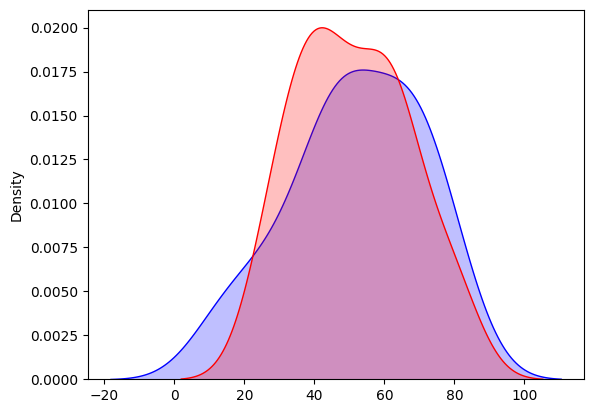

In [29]:
# plotting generated data
sns.kdeplot(a, fill=True, color='b')
sns.kdeplot(b, fill=True, color='r')

### One-Sample t-test

Your organization claims the average age of its employees is 30 years old. You collect a sample of 20 employees' age to check if the claim is true or not. We can use the hypothesis evaluation to test based on alpha value of 5%


- $H_0$: $\mu_a$ = X there's no difference between the sample and population age
- $H_a$: $\mu_d$ $\neq$ X there's a difference between sample and population age 
 
Note: X here is the population mean

In [18]:
# define X
pop_mean = 30
alpha = 0.05

In [14]:
df_ages = pd.read_csv('StatsDatasets/Ages.csv')
df_ages.shape

(20, 1)

This is a sample of 20, which is below 30, so we can use one-sample t test

In [15]:
t_stat, p_val = sts.ttest_1samp(df_ages, pop_mean)
print('t statistic:',t_stat, '|', 'p value:',p_val)

t statistic: [2.85505272] | p value: [0.01012962]


In [19]:
HypothTest(p_val,alpha)

We reject the null hypothesis.


We reject the null hypothesis based on the collected sample of employees. Therefore, the organization's claim is false.